In [48]:
import itertools
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [49]:
data = pd.read_csv('data/df_ml.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
df = data.copy()
df.head()

,id,title,vote_average,overview
0,19404,Dilwale Dulhania Le Jayenge,9.1,raj rich carefree happy go lucky second genera...
1,278,The Shawshank Redemption,8.5,framed double murder wife lover upstanding ban...
2,238,The Godfather,8.5,spanning year chronicle fictional italian amer...
3,372058,Your Name.,8.5,high schoolers mitsuha taki complete stranger ...
4,155,The Dark Knight,8.3,batman raise stake war crime help lt jim gordo...


In [50]:
stopwords = nltk.corpus.stopwords.words('english')
filtrar = []
if True:
    filtrar.append("u")
    filtrar.append("new")
    filtrar.append("The")
    filtrar.append("In")
    filtrar.append("A")

In [51]:
lista = []
for i in range(df.shape[0]):
    titular = df.iloc[i, -1]
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]

    lista.append(titular)

In [52]:
lista = list(itertools.chain(*lista))
lista[0:10]

['raj',
 'rich',
 'carefree',
 'happy',
 'go',
 'lucky',
 'second',
 'generation',
 'nri',
 'simran']

In [53]:
freq_peliculas =nltk.FreqDist(lista)
freq_peliculas

FreqDist({'life': 421, 'find': 351, 'world': 322, 'one': 258, 'year': 247, 'young': 230, 'must': 215, 'man': 210, 'family': 207, 'two': 201, ...})

In [54]:
palabras_peliculas = pd.DataFrame(list(freq_peliculas.items()), columns=['palabra', 'frecuencia'])
palabras_peliculas.head()

,palabra,frecuencia
0,raj,2
1,rich,20
2,carefree,5
3,happy,17
4,go,119


In [55]:
palabras_peliculas.sort_values('frecuencia', ascending=False, inplace=True)
palabras_peliculas.head(15)

,palabra,frecuencia
45,life,421
141,find,351
218,world,322
102,one,258
69,year,247
224,young,230
115,must,215
186,man,210
32,family,207
114,two,201


In [56]:
palabras_peliculas.reset_index(drop=True, inplace=True)

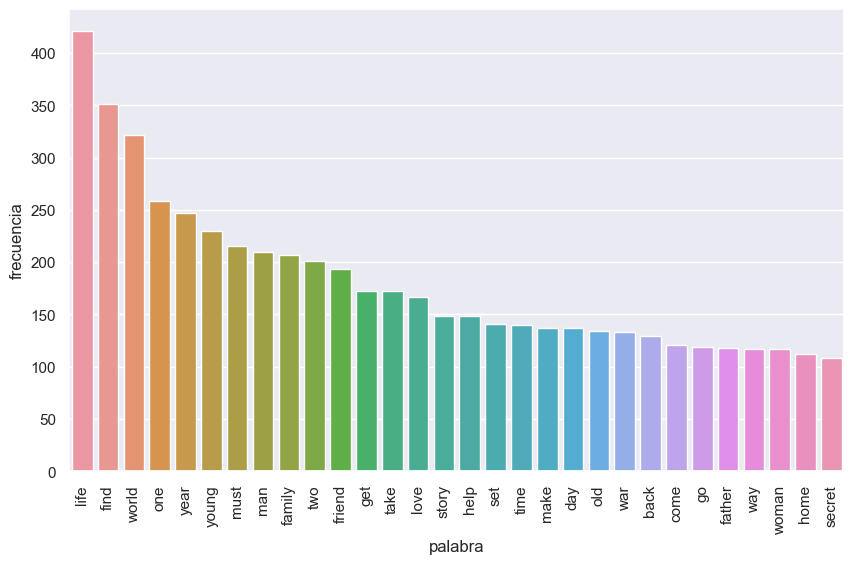

In [57]:
plt.figure(figsize=(10,6))
plot = sns.barplot(x = palabras_peliculas.iloc[:30].palabra, y=palabras_peliculas.iloc[:30].frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [58]:
lemmatizer = WordNetLemmatizer()


In [59]:
def preprocesamiento(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-zA-Z]', ' ', texto)
    tokens = texto.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords]
    texto_procesado = ' '.join(tokens)
    return texto_procesado

In [60]:
df['overview'] = df['overview'].apply(preprocesamiento)


In [61]:
df.head()

,id,title,vote_average,overview
0,19404,Dilwale Dulhania Le Jayenge,9.1,raj rich carefree happy go lucky second genera...
1,278,The Shawshank Redemption,8.5,framed double murder wife lover upstanding ban...
2,238,The Godfather,8.5,spanning year chronicle fictional italian amer...
3,372058,Your Name.,8.5,high schoolers mitsuha taki complete stranger ...
4,155,The Dark Knight,8.3,batman raise stake war crime help lt jim gordo...


In [62]:
df.to_csv('data/df_ml.csv')

In [63]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['overview'])

In [64]:
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [65]:
import joblib

In [66]:
joblib.dump(similarity_matrix, 'pickle/similarity_matrix.pkl')

['pickle/similarity_matrix.pkl']

In [67]:
def get_recommendations(nombre_pelicula, similarity_matrix, num_recommendations=5):
    movie_index = data[data['title'] == nombre_pelicula].index[0]
    similarity_scores = list(enumerate(similarity_matrix[movie_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_scores = similarity_scores[1:num_recommendations+1]
    top_movie_indices = [score[0] for score in top_scores]
    top_movies = data['title'].iloc[top_movie_indices]
    dicc = {}
    for i, v in enumerate(top_movies.values):
        dicc[i + 1] = v
    return dicc

In [68]:
recommended_movies = get_recommendations('Titanic', similarity_matrix)
print(recommended_movies)

{1: 'The Legend of 1900', 2: 'Ghost Ship', 3: 'Event Horizon', 4: 'Boyhood', 5: 'Deepwater Horizon'}
